## Week 4 - Random Walks
John Russell (johnrussell@g.harvard.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#this cell changes some matplotlib defaults to make plots nicer 
import matplotlib as mpl
mpl.rc("font", family='serif')
mpl.rc("figure", figsize=(9,6))
%config InlineBackend.figure_format = 'retina'

## Random numbers and random walks

Random number generation is a surprisingly tricky thing to do on a computer which we generally think of as highly non-random. Strictly speaking, we will be talking about *pseudo*random number generation since its impossible to genereate truly random numbers. However it is important enough that lots work has gone into doing it well and many of the best implementations live in the `numpy.random` module.

*Note*: The `numpy.random` module was changed significantly in summer of 2019 so what you'll see today is the modern (and higher performace) usage. For compatibility reasons, numpy still supports the old way and you are likely to come across older code which will look slightly different.

The core of the random module is a `Generator` object. The easiest and most likely best way to initialize one is

In [4]:
rng = np.random.default_rng() #rng stands for Random Number Generator

The `Generator` object can then generate numbers from a vast array of different distributions. You can learn about these in a statistics class but I'll show a few examples.

In [5]:
rng

Generator(PCG64) at 0x11EB52900

In [ ]:
#sample normal distribution

In [6]:
rng.normal(loc=5, scale=10, size=100)

array([ -0.24651768,   4.46746343,  10.04574159,  10.61079426,
        16.00623466,   9.5121112 ,   4.81477361,  -1.56896895,
         1.39312068,  -6.56813723,  11.95897764,   4.54904388,
         3.06396126,   2.47103437,  -6.05509702,  -1.7175864 ,
         6.85668611,  13.52252546,  -0.59658813,   2.47076541,
        12.51692893,   9.02903038,   5.36862341,   8.34741596,
         5.09539013,  -4.73546461,  10.25734099,   2.70655562,
         1.73430715,  -9.45222557,  11.37895552,   5.63967389,
         0.93870309, -15.5148833 ,  -8.23171388,   0.87773554,
        -5.30527559,  -3.08873313,   6.05345815,  -9.33212475,
       -12.43451098,   8.89777088,  18.58328154,  24.35121247,
       -15.71366169, -10.50625835,   4.89497648,  -6.75517546,
         4.32733111,  10.15970783,  13.82349425,  20.97411077,
        -3.93345172,  19.91654446,  -5.53009696,   6.05065533,
        -0.46769875,  -3.13849354,  18.84281429,   2.98061102,
        -0.33129928,   6.05467021,   5.40576994,  15.03

In [ ]:
#show every distribution, sample gamma

In [ ]:
rng.

In [7]:
#Randomly choose from pets
pets = ['cat', 'dog', 'fish', 'rabbit']

In [8]:
rng.choice(pets, size=5)

array(['dog', 'rabbit', 'dog', 'rabbit', 'fish'], dtype='<U6')

#### Random Walks

Random walks are a *very* powerful and widely used model in basically every area of science. One of the great things about random walks is that they are very easy to simulate and often analytically tractable (the math is much beyond the scope of this bootcamp but happy to discuss in office hours as usual). We'll work on these today since they pull together pretty much all of the numpy tools we have discussed.

Here is the idea: a walker starts at some point and at each time point takes a "random step." There are many ways to define a random step but lets focus on the simplest case in 1 dimension. 
- A walker starts at 0 on the number line.
- The walker flips a coin.
- If the coin comes heads, take a step to the right (+1)
- If the coin comes up tails take a step to the left (-1)
- Repeat this process for many time steps i.e. coin flips.

In [26]:
steps = rng.choice([-1,1], size=1000)

In [27]:
position = np.cumsum(steps)

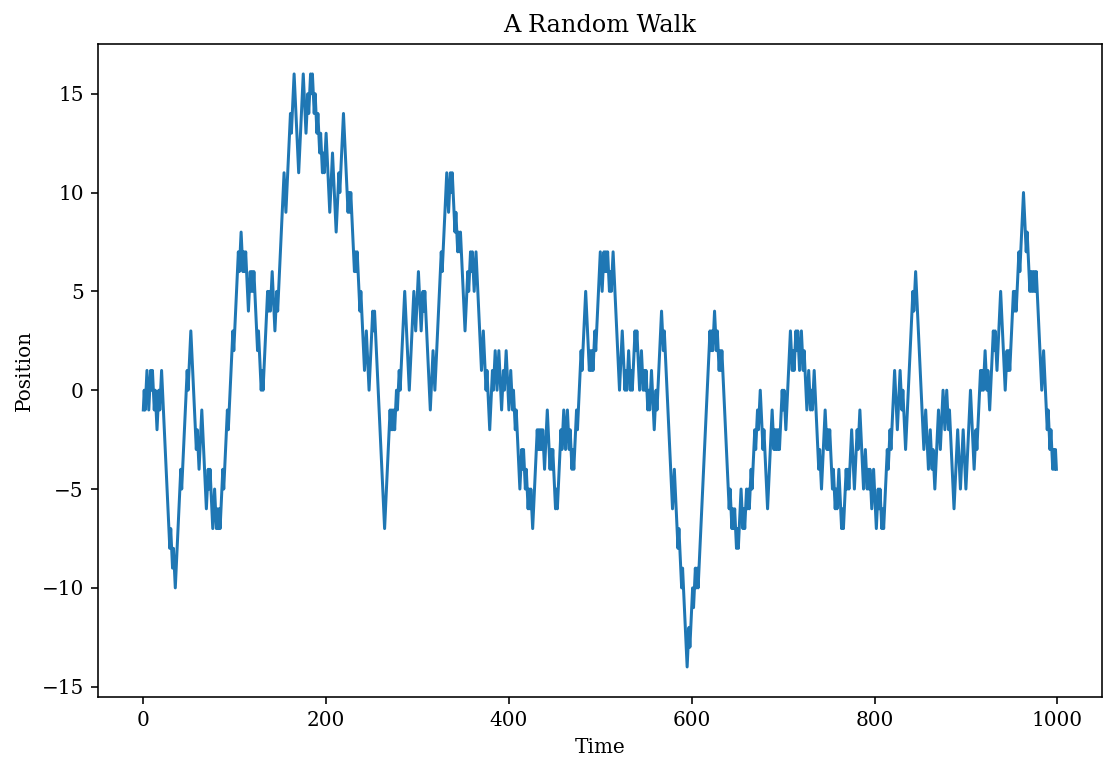

In [28]:
plt.plot(position)
plt.title("A Random Walk")
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

#### Compiling statistics

Often the idea with simulating random walkers is that we simulate many of them and the calculate statistics as a function of time. Said slightly differently, we often average over the walkers rather than averaging over time. 

In [31]:
# generate 500 rws
steps = rng.choice([-1,1], size=(1000,5000)) #1000 steps or time points, 500 walkers

In [32]:
positions = steps.cumsum(axis=0)

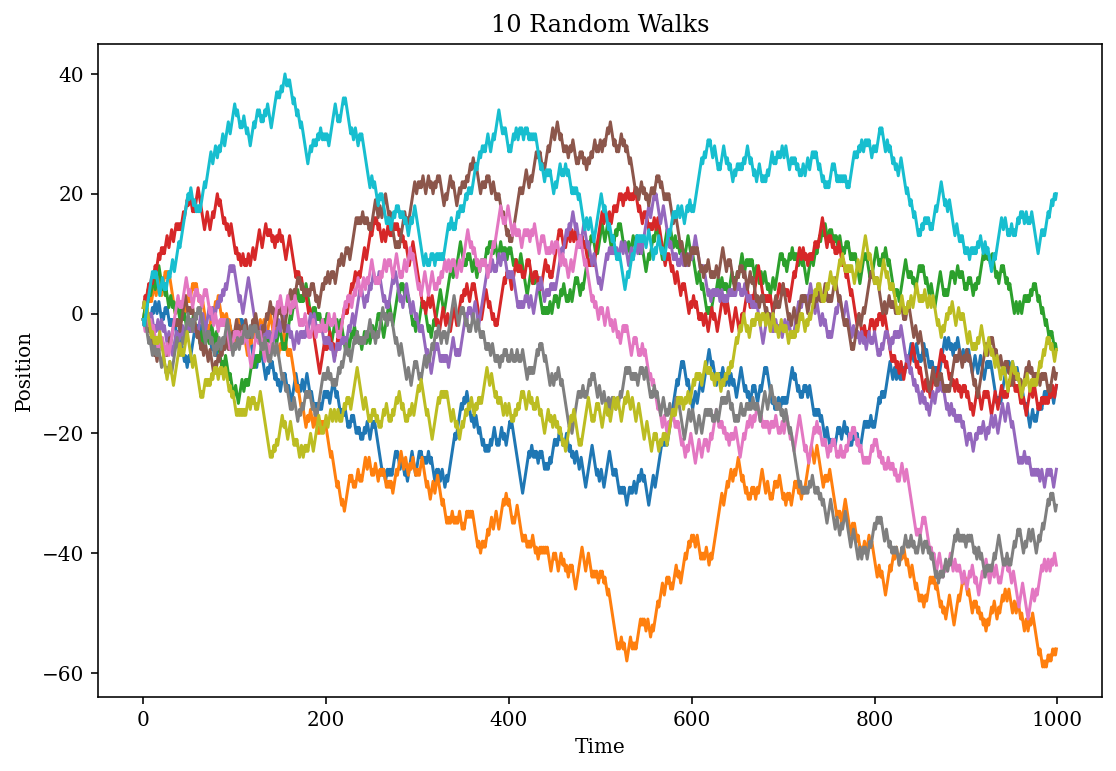

In [19]:
plt.plot(positions[:,:10])
plt.title("10 Random Walks")
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

Remember that we have 500 walkers and 1000 time steps so the first dimension in this array is time and the second dimension is the walkers.

In [ ]:
positions.shape

In [33]:
mean = positions.mean(1)
std = positions.std(1)

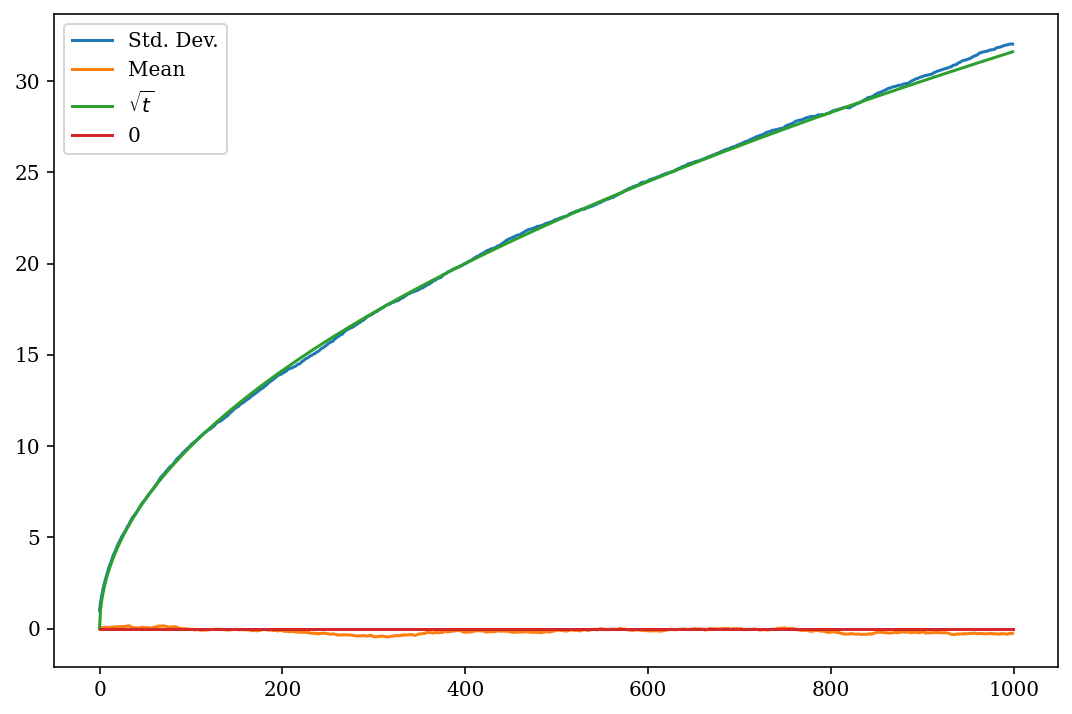

In [35]:
plt.plot(std, label="Std. Dev.")
plt.plot(mean, label='Mean')
plt.plot(np.sqrt(np.arange(1000)), label=r"$\sqrt{t}$")
plt.plot(np.zeros(1000), label='0')
# fit standard deviation
plt.legend()
plt.show()

### Random Walks Exercise

*Note* Since we are generating random numbers your individual results may be slightly different. 


#### Part a.

Similate 100 random walkers each taking 1000 steps as above but rather than a "coin flip" to determine the step, have these walkers take a step to the right (+1) with probability 0.65 and a step to the left (-1) with probability 0.35 - this is often called a biased random walk. Make plot showing the trajectories of the walkers which ended up farthest from the origin and closest to the origin.

*Hint* Read the documentation of `rng.choice`

In [61]:
# generate 500 rws
steps = rng.choice([-1,1], size=(1000,100), p=[0.35,0.65]) #1000 steps or time points, 500 walkers

In [62]:
positions = steps.cumsum(axis=0)

In [63]:
furthest = positions[-1].argmax()
closest = positions[-1].argmin()

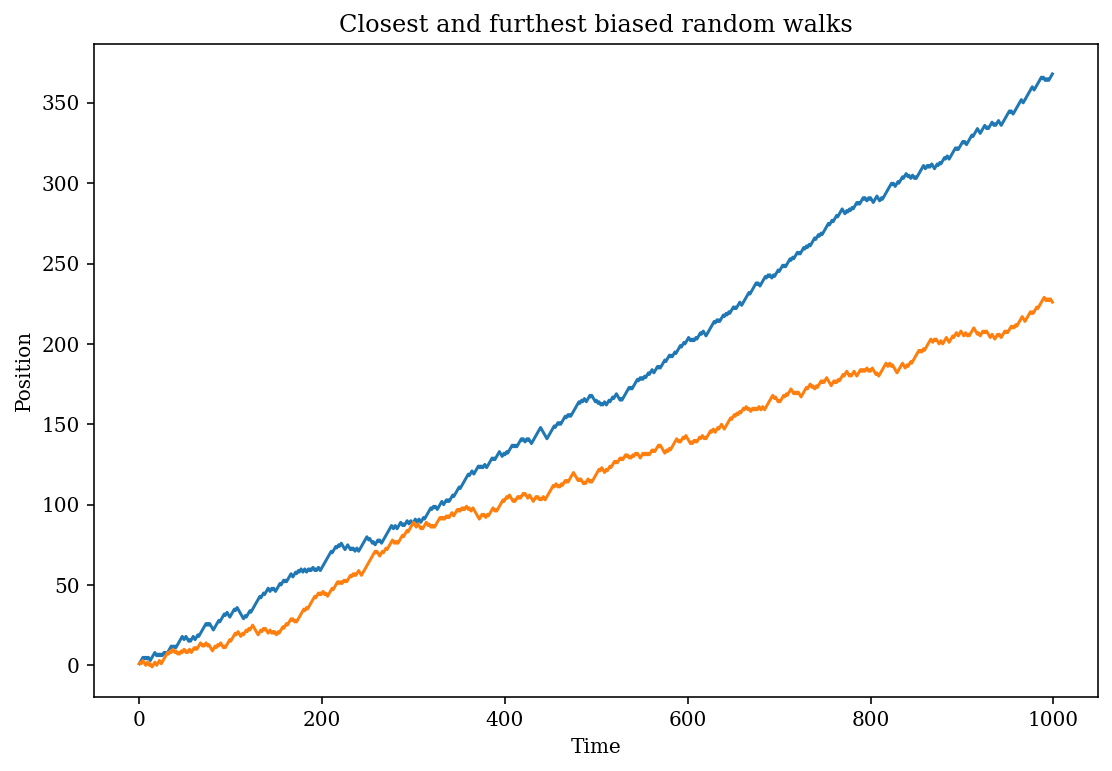

In [64]:
plt.plot(positions[:,furthest], label='Furthest')
plt.plot(positions[:,closest], label='Furthest')
plt.title("Closest and furthest biased random walks")
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

#### Part b.

- Compute the mean and standard deviation of these walkers as a function of time. 
- Plot the mean and standard deviation as a function of time on the same axes. 
- Plot $\sqrt{t}$ as above and plot on the same axes. Does it still seem to describe the standard deiviation as a function of time?
- **Optional** Can you come up with a function that describes the mean as a function of time? Plot this function as well. *Hint* How do you think the average depends on the probability of going right? Does your formula give the correct result from the demo above when $p=0.5$?

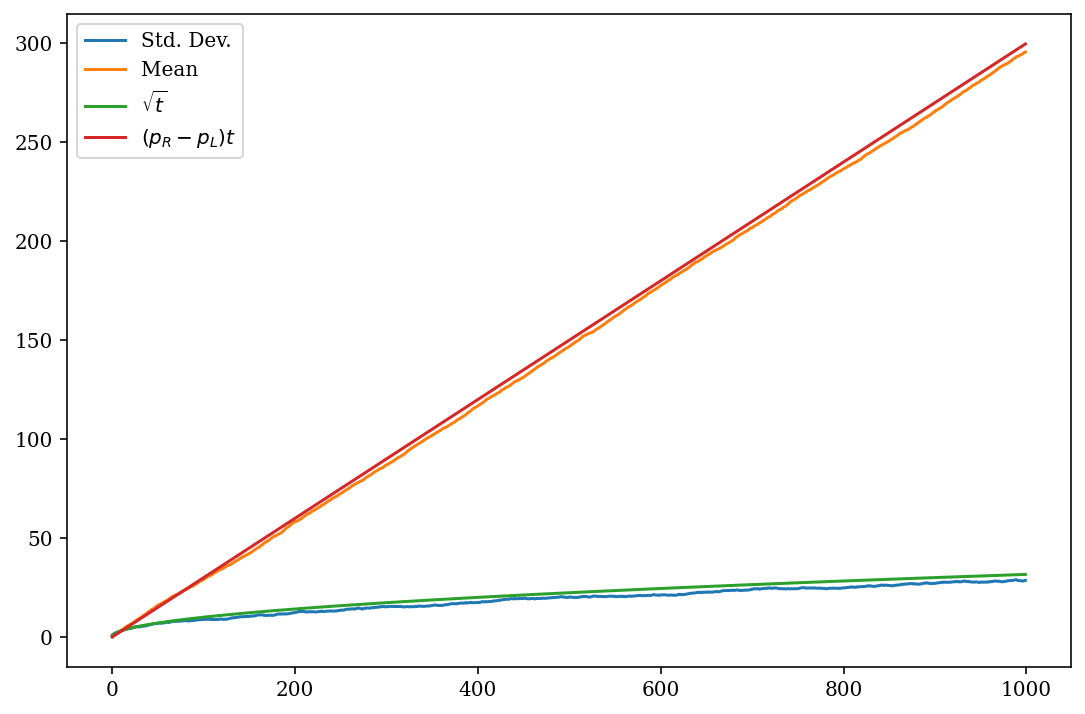

In [69]:
plt.plot(positions.std(1), label="Std. Dev.")
plt.plot(positions.mean(1), label='Mean')
plt.plot(np.sqrt(np.arange(1000)), label=r"$\sqrt{t}$")
plt.plot(0.3*np.arange(1000), label=r'$(p_R - p_L)t$')
# fit standard deviation
plt.legend()
plt.show()

The average positions of these walkers clearly moves to the right (or positive direction). On average the walkers move right at speed $p_R-p_L$ which is the average step taken by a walker. This does reduce to the case above when $p_R=p_L =0.5$. 

#### Part c. 

Rather than just walking up and down the number line, lets see what happens when the walk happens in two dimensions. Simulate 100 walkers each taking 1000 steps in the XY plane. Generate a 2D step by taking 2 independent samples from a standard normal distribution (mean=0, standard deviation=1). Plot 10 walks *in the XY plane*.

In [70]:
steps = rng.normal(size=(1000,10,2))
positions = steps.cumsum(0)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(positions[...,0], positions[...,1])

#### Part d.

Find the walkers which end up the farthest from the origin and the closest. Plot these two trajectories in the XY plane.

*Hint* Given a point $(x,y)$ how do you compute the distance from the origin? Can you use numpy to compute the distance for all the walkers at all the time points without any loops?

**Optional** Plot the trajectories of all the walkers in black and pass the keyword argument `alpha=0.25` to `plt.plot` which makes the lines somewhat transparent. Then plot the furthest and closest trajectories on the same axes in two different colors of your choice.

In [36]:
steps = rng.normal(size=(1000,100,2))
positions = steps.cumsum(0)

In [37]:
distance = np.sqrt(positions[...,0]**2 + positions[...,1]**2)

In [39]:
furthest = distance[-1].argmax()
closest = distance[-1].argmin()

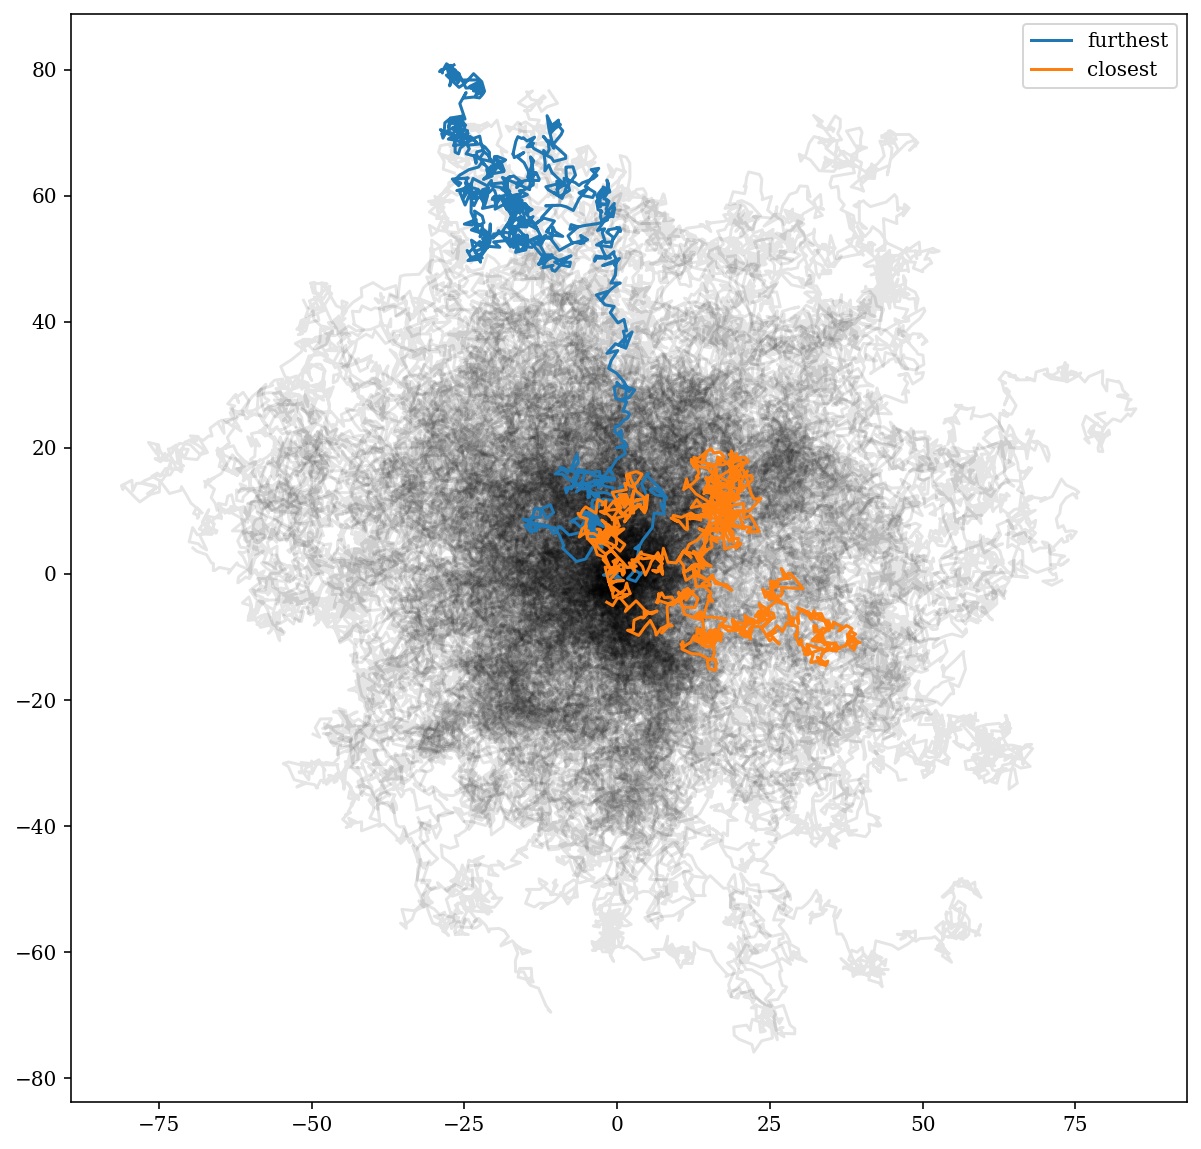

In [45]:
plt.figure(figsize=(10,10))
plt.plot(positions[...,0], positions[...,1], color='k', alpha=0.1)
plt.plot(positions[:,furthest,0], positions[:,furthest,1], label='furthest')
plt.plot(positions[:,closest,0], positions[:,closest,1], label='closest')
plt.legend()
plt.show()

#### Part e. 

Plot the trajectories of any walkers who remain in the first quadrant for their entire trajectory (i.e. $x(t)>0$ and $y(t)>0$ for all times $t$). You will probably want to simulate more walkers (~$10^5$) in order to find some who meet this criterion, it happens with probability ~0.05\%.

In [46]:
positions2 = rng.normal(size=(1000, int(1e5), 2)).cumsum(0)

In [48]:
first_quad = np.all((positions2[...,0]>0)&(positions2[...,1]>0), axis=0)

In [53]:
print(f"{first_quad.sum()} out of 10^5 walkers never leave the first quadrant.")

26 out of 10^5 walkers never leave the first quadrant.


In [54]:
first_quad_positions  = positions2[:, first_quad,:]

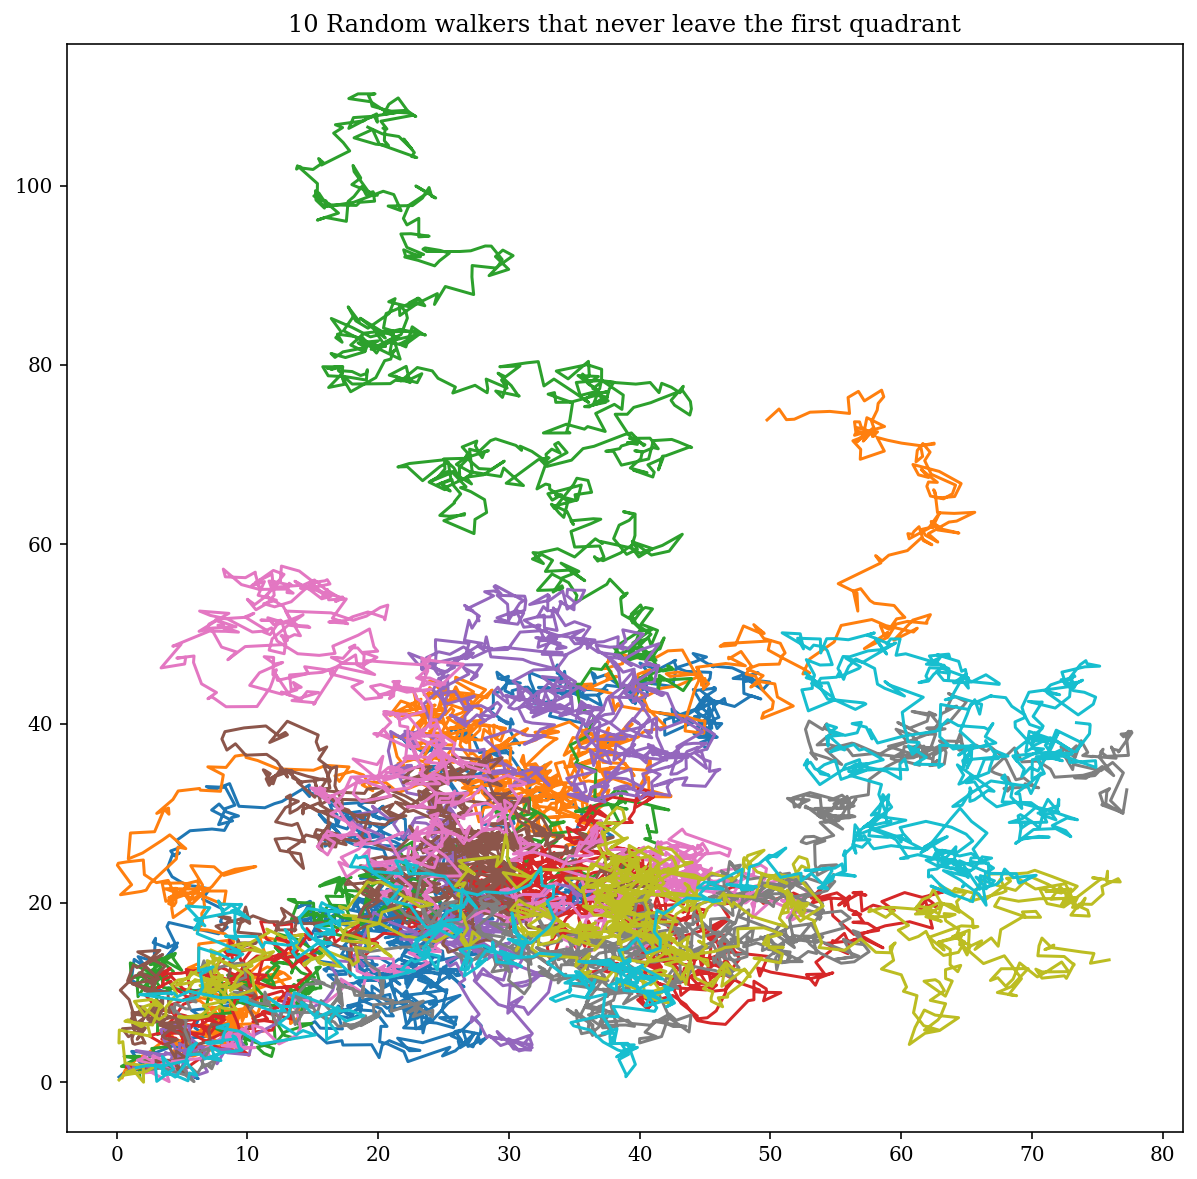

In [58]:
plt.figure(figsize=(10,10))
plt.plot(first_quad_positions[:,:10,0], first_quad_positions[:,:10,1])
plt.title('10 Random walkers that never leave the first quadrant')
plt.show()